In [1]:
#necessary libraries
import pandas as pd
import numpy as np

In [2]:
#reading the dataset into a dataframe and showing first 5 rows
dataframe = pd.read_csv('corona_tested_individuals_ver_0083.english.csv', low_memory=False)
dataframe.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [3]:
#shape of the dataset
dataframe.shape

(2742596, 10)

In [4]:
#null values in the dataset
dataframe.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [5]:
#drop the null values
dataframe.dropna(inplace=True)

In [6]:
#null values in the dataset after dropping null values
dataframe.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [7]:
#shape of the dataset after dropping null values
dataframe.shape

(2186227, 10)

In [8]:
#dropping the date and age column
dataframe.drop('test_date', inplace=True, axis=1)
dataframe.drop('age_60_and_above', inplace=True, axis=1)
dataframe.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,negative,male,Other
1,0,1,0,0,0,negative,male,Other
2,0,0,0,0,0,negative,female,Other
3,0,0,0,0,0,negative,male,Other
4,0,1,0,0,0,negative,male,Contact with confirmed


In [9]:
#number of unique values in each column
dataframe.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
gender                 2
test_indication        3
dtype: int64

In [10]:
#unique values in each column
for col in dataframe:
    print(col, ': ', dataframe[col].unique())

cough :  [0 1]
fever :  [0 1]
sore_throat :  [0 1]
shortness_of_breath :  [0 1]
head_ache :  [0 1]
corona_result :  ['negative' 'positive' 'other']
gender :  ['male' 'female']
test_indication :  ['Other' 'Contact with confirmed' 'Abroad']


In [11]:
#dropping the rows with other corona results
dataframe = dataframe[dataframe.corona_result != 'other']
dataframe['corona_result'].value_counts()

negative    1943172
positive     208726
Name: corona_result, dtype: int64

In [12]:
#checking the final shape of the dataset
dataframe.shape

(2151898, 8)

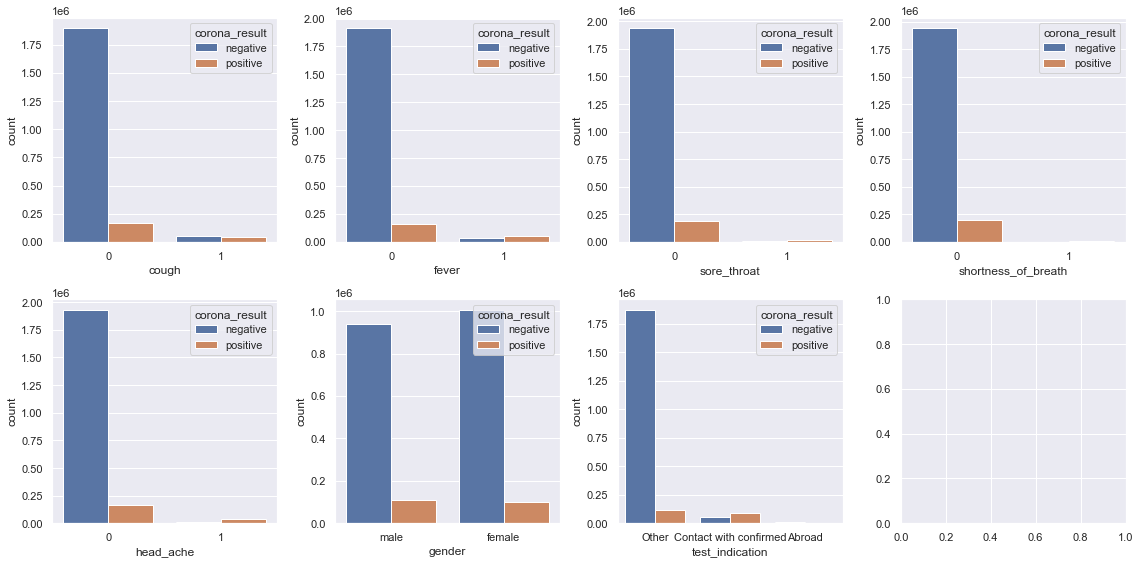

In [13]:
#corona_result in term of cough feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(2,4)
sns.countplot(x="cough", hue="corona_result", data=dataframe, ax=ax[0,0])
sns.countplot(x="fever", hue="corona_result", data=dataframe, ax=ax[0,1])
sns.countplot(x="sore_throat", hue="corona_result", data=dataframe, ax=ax[0,2])
sns.countplot(x="shortness_of_breath", hue="corona_result", data=dataframe, ax=ax[0,3])
sns.countplot(x="head_ache", hue="corona_result", data=dataframe, ax=ax[1,0])
#sns.countplot(x="age_60_and_above", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="gender", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="test_indication", hue="corona_result", data=dataframe, ax=ax[1,2])
plt.tight_layout()

In [14]:
#convreting the cetegorical values into numerical values
pd.options.mode.chained_assignment = None
dataframe['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)
#dataframe['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)
dataframe['gender'].replace(['male', 'female'], [1, 0], inplace=True)
dataframe['test_indication'].replace(['Other', 'Contact with confirmed', 'Abroad'], [0, 1, 2], inplace=True)

dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,1


<AxesSubplot:>

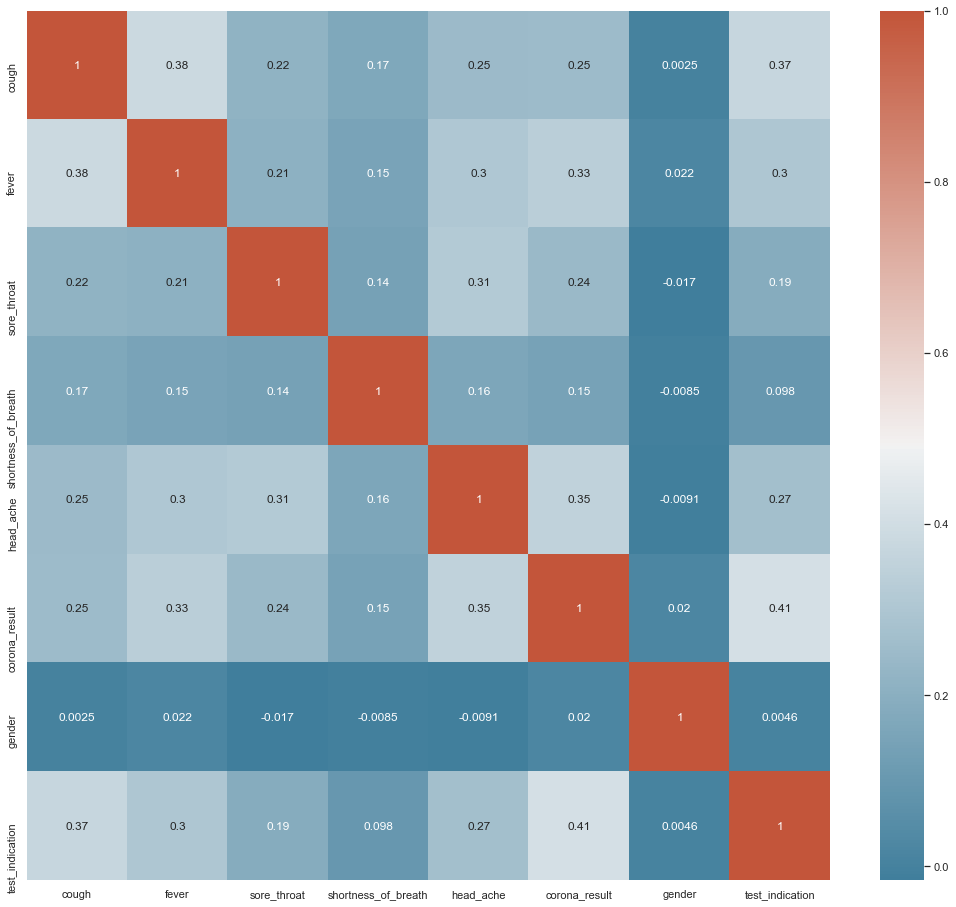

In [15]:
#ploting a heatmap showing the coorelation
plt.figure(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataframe.corr(), cmap=cmap, annot=True)

# Model Training

### Spliting data into test and train set

In [16]:
#features
X = dataframe.drop('corona_result',axis=1)

#target variable
y = dataframe['corona_result']

In [17]:
#count of positive and negative case in the dataset
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 1943172, 1: 208726})


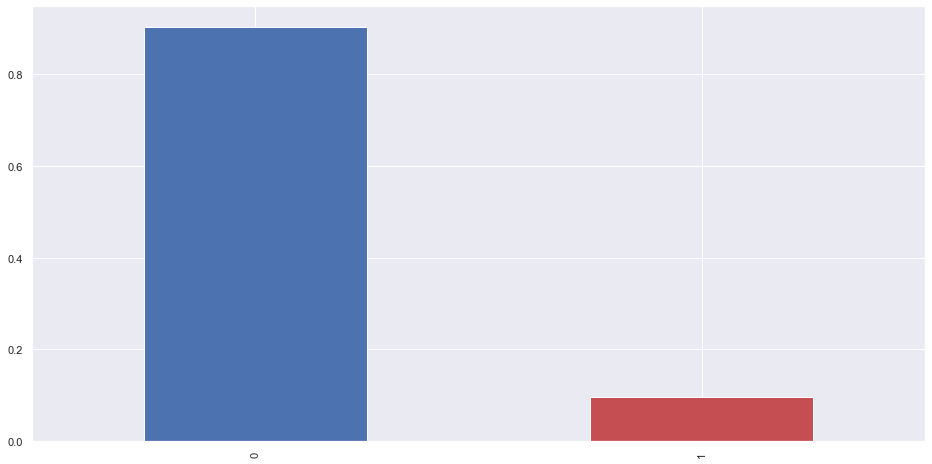

In [18]:
#plot it for a better visualization
class_distribution = pd.Series(y).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [19]:
#undersampling data to balance it
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 260907, 1: 208726})


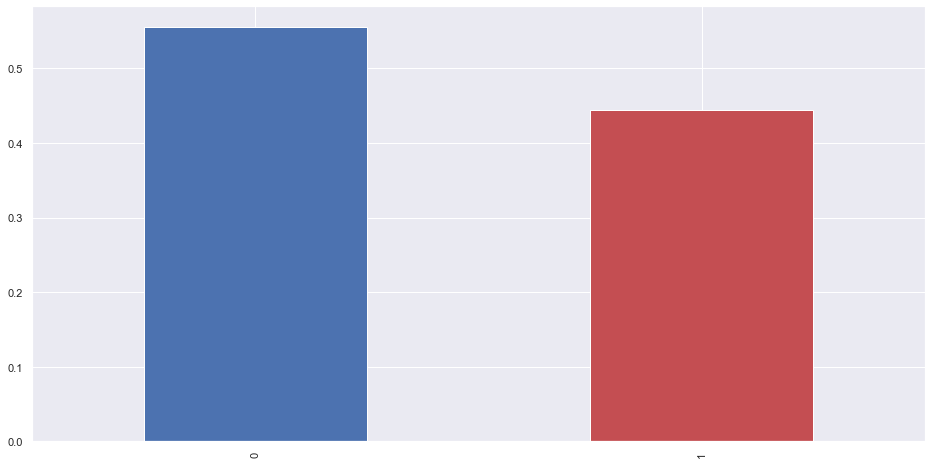

In [20]:
#plot it for a better visualization
class_distribution = pd.Series(y_res).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [21]:
#splitting the data into 75% train data and 25% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=101)

In [22]:
#number of training data
X_train.shape

(352224, 7)

In [23]:
#number of test data
X_test.shape

(117409, 7)

### Logistic Regression Model

In [24]:
#necessary library
from sklearn.linear_model import LogisticRegression

In [25]:
#training the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
#prediction on test data
predictions = log_model.predict(X_test)

In [27]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
305571,1,1
86972,0,0
104149,0,0
198666,0,0
424594,1,1
...,...,...
122348,0,0
321254,1,0
176260,0,0
426120,1,0


In [28]:
#model's accurary score
log_model.score(X_test, y_test)

0.8091628410087812

In [29]:
#save the model
import pickle

filename = 'LogisticRegression_model.sav'
pickle.dump(log_model, open(filename, 'wb'))

#### Evaluating logistic regression model

In [30]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [31]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.76      0.95      0.85     65226
    Positive       0.92      0.63      0.75     52183

    accuracy                           0.81    117409
   macro avg       0.84      0.79      0.80    117409
weighted avg       0.83      0.81      0.80    117409



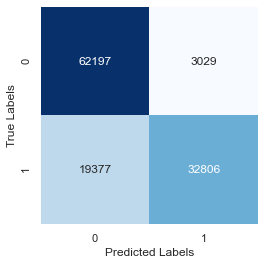

In [32]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()


In [33]:
#mean squared error
mean_squared_error(y_test, predictions)

0.19083715899121872

In [34]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.19083715899121872

In [35]:
#r2 Score
r2_score(y_test, predictions)

0.22711312631871683

### Decision Tree Model

In [36]:
#finding optimum depth for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = []
for i in range(1, 10):
    d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=i)
    d_tree.fit(X_train, y_train)
    y_predict = d_tree.predict(X_test)
    depth.append(accuracy_score(y_test, y_predict))
    print('Depth= ', i, ": ", accuracy_score(y_test, y_predict))

Depth=  1 :  0.735480244274289
Depth=  2 :  0.7824272415232223
Depth=  3 :  0.8031241216601793
Depth=  4 :  0.8117350458653084
Depth=  5 :  0.8154315256922382
Depth=  6 :  0.8167261453551261
Depth=  7 :  0.8167176281205019
Depth=  8 :  0.8167091108858776
Depth=  9 :  0.8167091108858776


No handles with labels found to put in legend.


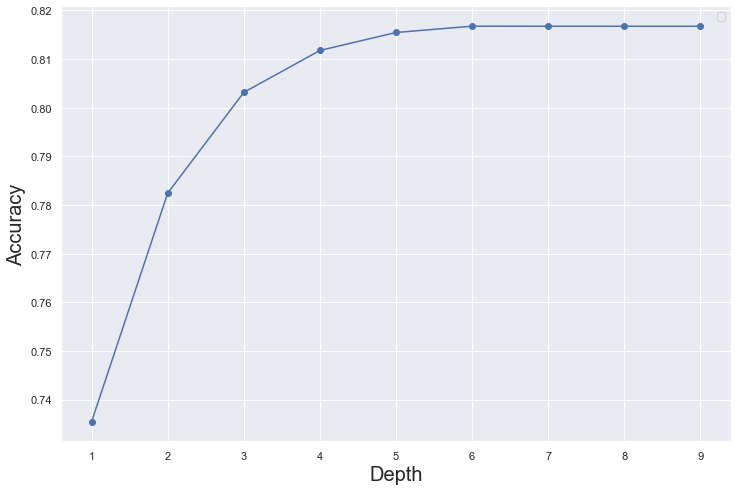

In [37]:
#ploting the accuracies for different tree depth
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), depth, marker='o')
plt.xlabel('Depth', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 10))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [38]:
#making model with depth=7 for prediction
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=100)

In [39]:
#prediction on test data
predictions = d_tree.predict(X_test)

In [40]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
305571,1,1
86972,0,0
104149,0,0
198666,0,0
424594,1,1
...,...,...
122348,0,0
321254,1,0
176260,0,0
426120,1,0


In [41]:
#model's accurary score
d_tree.score(X_test, y_test)

0.8167176281205019

In [42]:
#save the model
import pickle

filename = 'DecisionTree_model.sav'
pickle.dump(d_tree, open(filename, 'wb'))

#### Evaluating Decision Tree model

In [43]:
#classification report for Decision Tree
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.77      0.95      0.85     65226
    Positive       0.91      0.65      0.76     52183

    accuracy                           0.82    117409
   macro avg       0.84      0.80      0.81    117409
weighted avg       0.83      0.82      0.81    117409



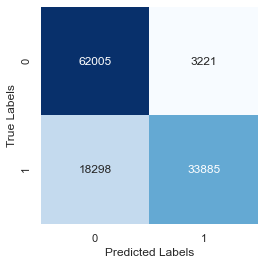

In [44]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [45]:
#mean squared error
mean_squared_error(y_test, predictions)

0.18328237187949817

In [46]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.18328237187949817

In [47]:
#r2 Score
r2_score(y_test, predictions)

0.25770987080480534

### Random Forest Model

In [48]:
#creating model and making predicton
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
#prediction on test data
predictions = r_forest.predict(X_test)


In [50]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
305571,1,1
86972,0,0
104149,0,0
198666,0,0
424594,1,1
...,...,...
122348,0,0
321254,1,0
176260,0,0
426120,1,0


In [51]:
#model's accurary score
r_forest.score(X_test, y_test)

0.8167176281205019

In [52]:
#save the model

filename = 'RandomForest_model.sav'
pickle.dump(r_forest, open(filename, 'wb'))

#### Evaluating Random Forest model

In [53]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.77      0.95      0.85     65226
    Positive       0.91      0.65      0.76     52183

    accuracy                           0.82    117409
   macro avg       0.84      0.80      0.81    117409
weighted avg       0.83      0.82      0.81    117409



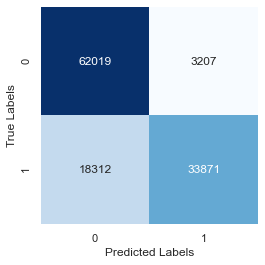

In [54]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [55]:
#mean squared error
mean_squared_error(y_test, predictions)

0.18328237187949817

In [56]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.18328237187949817

In [57]:
#r2 Score
r2_score(y_test, predictions)

0.25770987080480534

### KNN Model

Creating a smaller subset of test data for KNN

In [58]:
d_X_test = X_test.head(10000)
#d_X_test.value_counts()

In [59]:
d_y_test = y_test.head(10000)
d_y_test.value_counts()

0    5574
1    4426
Name: corona_result, dtype: int64

Training the model

In [60]:
#necessary library
from sklearn.neighbors import KNeighborsClassifier

In [61]:
#making model with k=25 for prediction
KNN = KNeighborsClassifier(n_neighbors=25, n_jobs=-1)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [62]:
#prediction on test data
predictions = KNN.predict(X_test)

In [63]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
305571,1,1
86972,0,0
104149,0,0
198666,0,0
424594,1,1
...,...,...
122348,0,0
321254,1,0
176260,0,0
426120,1,0


In [64]:
#model's accurary score
KNN.score(X_test, y_test)

0.8166324557742592

In [65]:
#save the model

filename = 'KNN_model.sav'
pickle.dump(KNN, open(filename, 'wb'))

#### Evaluating KNN model

In [66]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.77      0.95      0.85     65226
    Positive       0.91      0.65      0.76     52183

    accuracy                           0.82    117409
   macro avg       0.84      0.80      0.81    117409
weighted avg       0.83      0.82      0.81    117409



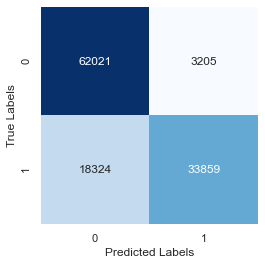

In [67]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [68]:
#mean squared error
mean_squared_error(y_test, predictions)

0.18336754422574078

In [69]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.18336754422574078

In [70]:
#r2 Score
r2_score(y_test, predictions)

0.2573649244182654

### Model Performance Comparison

ROC & DET Curve

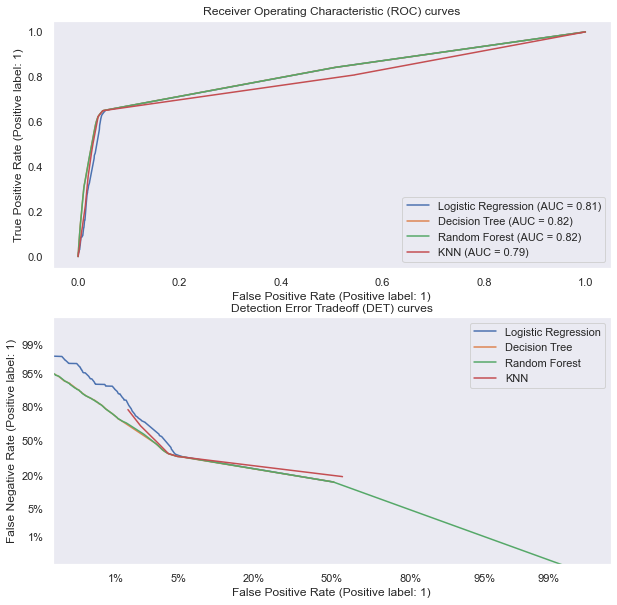

In [71]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

#N_SAMPLES = 1000

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7),
    "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=25, n_jobs=-1),
}


# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(2, 1, figsize=(10, 10))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [72]:
models_scores_table = pd.DataFrame({'Logistic Regression':[.8091, 0.83, 0.81, 0.80, 0.76, 0.92],
                                    'Decision Tree':[0.8167, 0.83, 0.82, 0.81, 0.77, 0.91],
                                    'Random Forest':[0.8167, 0.83, 0.82, 0.81, 0.77, 0.91],
                                    'KNN':[0.8166, 0.83, 0.82, 0.81, 0.77, 0.91]},
                                    index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Negative Precision', 'Positive Precision'])

In [73]:
models_scores_table

,Logistic Regression,Decision Tree,Random Forest,KNN
Accuracy,0.8091,0.8167,0.8167,0.8166
Precision,0.8300,0.8300,0.8300,0.8300
Recall,0.8100,0.8200,0.8200,0.8200
F1 Score,0.8000,0.8100,0.8100,0.8100
Negative Precision,0.7600,0.7700,0.7700,0.7700
Positive Precision,0.9200,0.9100,0.9100,0.9100


In [74]:
best_scores = models_scores_table
best_scores['Best Score'] = models_scores_table.idxmax(axis=1)
best_scores

,Logistic Regression,Decision Tree,Random Forest,KNN,Best Score
Accuracy,0.8091,0.8167,0.8167,0.8166,Decision Tree
Precision,0.8300,0.8300,0.8300,0.8300,Logistic Regression
Recall,0.8100,0.8200,0.8200,0.8200,Decision Tree
F1 Score,0.8000,0.8100,0.8100,0.8100,Decision Tree
Negative Precision,0.7600,0.7700,0.7700,0.7700,Decision Tree
Positive Precision,0.9200,0.9100,0.9100,0.9100,Logistic Regression


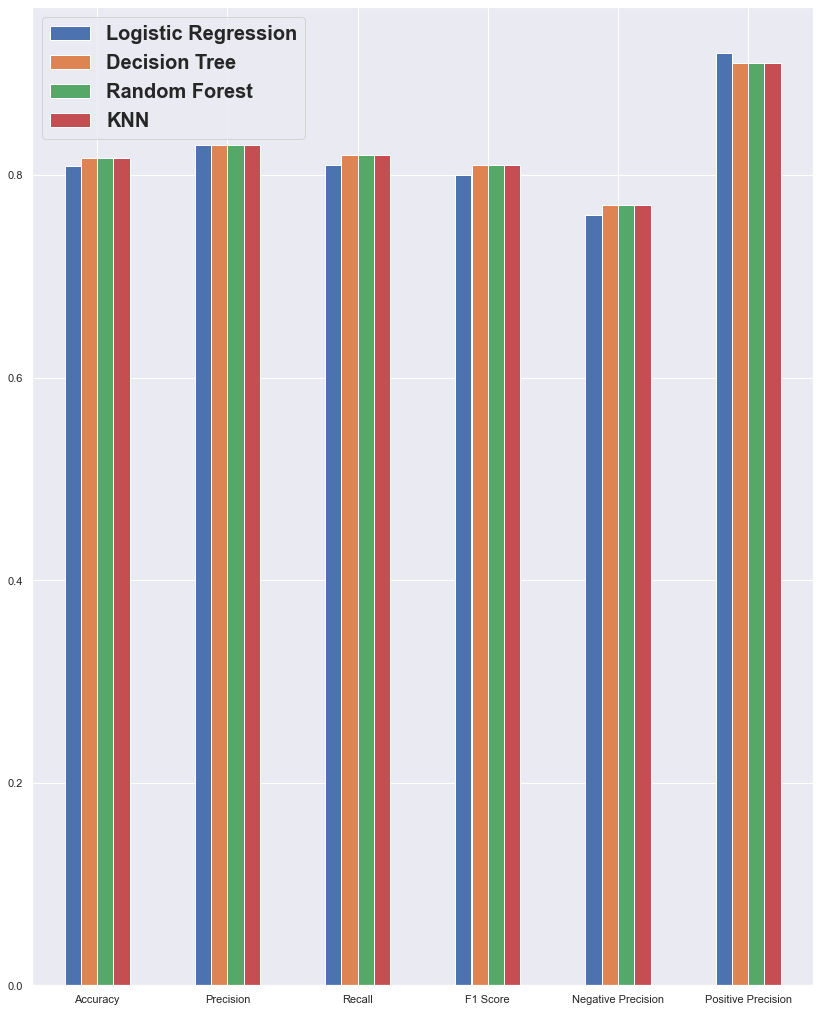

In [75]:
ax = models_scores_table.plot.bar(rot=0, figsize=(14,18))
legend_prop = {'weight':'bold', 'size': 20}
plt.legend(prop=legend_prop)
plt.show()

# Training ANN Model

### Creating the model

In [76]:
#necessary library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [77]:
X_train.shape

(352224, 7)

In [90]:
model = Sequential()

# input layer
model.add(Dense(60,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
#training the model
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
11007/11007 [==============================] - 27s 2ms/step - loss: 0.4557 - val_loss: 0.4546
Epoch 2/25
11007/11007 [==============================] - 18s 2ms/step - loss: 0.4522 - val_loss: 0.4535
Epoch 3/25
11007/11007 [==============================] - 20s 2ms/step - loss: 0.4520 - val_loss: 0.4540
Epoch 4/25
11007/11007 [==============================] - 22s 2ms/step - loss: 0.4518 - val_loss: 0.4534
Epoch 5/25
11007/11007 [==============================] - 25s 2ms/step - loss: 0.4517 - val_loss: 0.4532
Epoch 6/25
11007/11007 [==============================] - 24s 2ms/step - loss: 0.4516 - val_loss: 0.4533
Epoch 7/25
11007/11007 [==============================] - 25s 2ms/step - loss: 0.4516 - val_loss: 0.4529
Epoch 8/25
11007/11007 [==============================] - 24s 2ms/step - loss: 0.4515 - val_loss: 0.4531
Epoch 9/25
11007/11007 [==============================] - 23s 2ms/step - loss: 0.4515 - val_loss: 0.4539
Epoch 10/25
11007/11007 [==============================

### Saving the model

In [92]:
#necessary library
from tensorflow.keras.models import load_model

model.save('ANN_model.h5')  

### Evaluating the ANN Model

<AxesSubplot:>

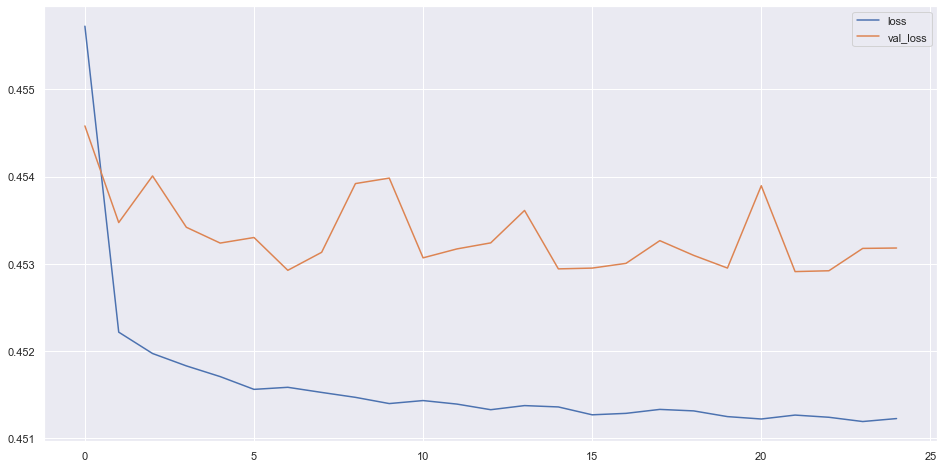

In [93]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [98]:
#predicting using ANN model
predictions = model.predict_classes(X_test)

In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     65226
           1       0.91      0.65      0.76     52183

    accuracy                           0.82    117409
   macro avg       0.84      0.80      0.81    117409
weighted avg       0.83      0.82      0.81    117409



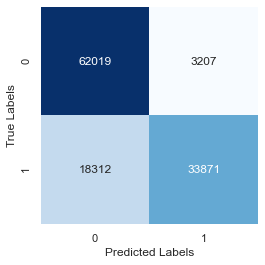

In [100]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [101]:
#mean squared error
mean_squared_error(y_test, predictions)

0.18328237187949817

In [102]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.18328237187949817

In [103]:
#r2 Score
r2_score(y_test, predictions)

0.25770987080480534